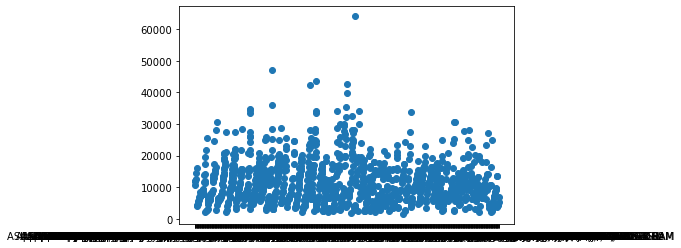

In [1]:
import pandas as pd
from sklearn import preprocessing
import sklearn.linear_model
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
#1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
data = 'laptops.csv'
df = pd.read_csv(data, decimal=',')
df.columns = ["name", "price"]
#3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
plt.figure()
plt.scatter(df['name'], df['price'])
plt.show()

In [35]:
#df.drop(['name'], 'columns', inplace=True)
bw = estimate_bandwidth(df, quantile=0.2)
analyzer = MeanShift(bandwidth=bw)
analyzer.fit(df)
centers = analyzer.cluster_centers_
labels = analyzer.labels_
n_clusters = len(np.unique(labels))
#5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
print('labels:',np.unique(labels))
print('cluster centers:',centers)
print('number of clusters:', len(np.unique(labels)))

labels: [0 1 2 3 4 5]
cluster centers: [[ 7382.5267666]
 [25164.       ]
 [32430.75     ]
 [42136.25     ]
 [64146.       ]
 [47224.       ]]
number of clusters: 6


Text(0.5, 1.0, 'Estimated number of clusters: 6')

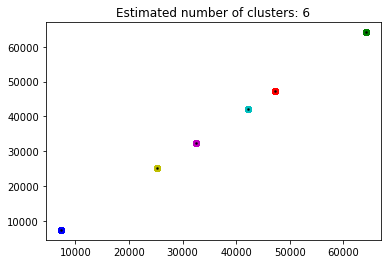

In [51]:
#5. create a new scatter plot where each flower is colored according to cluster label
data_2d, _ = make_blobs(n_samples=len(df), centers=centers, cluster_std=0.1)
analyzer.fit(data_2d)
centers = analyzer.cluster_centers_
labels = analyzer.labels_
n_clusters = len(np.unique(labels))

#6 Plot the clusters in different colors
fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = centers[k]
    x, y = data_2d[my_members], data_2d[my_members]
    ax.scatter(x, y, c=col, linewidth=0.2)
    #7. add a dot for the cluster centers
    ax.scatter(cluster_center, cluster_center, c='k', s=5, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))